In [12]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

In [13]:
data = container.Container(sample=pd.read_pickle("data/sample.pkl"))
data["balanced"] = pd.concat((
    data.sample[data.sample.nbg == 1].sample(786),
    data.sample[data.sample.nbg == 0]))
data["small_sample"] = pd.read_pickle("data/small_sample.pkl")

## Features cleaning

In [14]:
sclasses = {
    "nbg": 1,
    "no-nbg": 0}
sclasses

{'nbg': 1, 'no-nbg': 0}

In [15]:
data.sample.shape, data.balanced.shape, data.small_sample.shape

((12598, 161), (1572, 161), (4352, 161))

In [16]:
X_columns = clean_features(data, "sample")
X_columns = X_columns[
    ~(X_columns.str.contains("Freq2_") | X_columns.str.contains("Freq3_"))]
print("Total features:", X_columns.size)

Removing [] because null
Removing ['src1_Freq1_harmonics_rel_phase_0', 'src1_Freq2_harmonics_rel_phase_0', 'src1_Freq3_harmonics_rel_phase_0', 'src2_Freq1_harmonics_rel_phase_0', 'src2_Freq2_harmonics_rel_phase_0', 'src2_Freq3_harmonics_rel_phase_0'] because lowvariance
('Total features:', 114)


In [17]:
set(x.split("_", 1)[-1] for x in X_columns)

{'Amplitude',
 'AmplitudeH',
 'AmplitudeJ',
 'AmplitudeJH',
 'AmplitudeJK',
 'Autocor_length',
 'Beyond1Std',
 'CAR_mean',
 'CAR_sigma',
 'CAR_tau',
 'Con',
 'Eta_e',
 'FluxPercentileRatioMid20',
 'FluxPercentileRatioMid35',
 'FluxPercentileRatioMid50',
 'FluxPercentileRatioMid65',
 'FluxPercentileRatioMid80',
 'Freq1_harmonics_amplitude_0',
 'Freq1_harmonics_amplitude_1',
 'Freq1_harmonics_amplitude_2',
 'Freq1_harmonics_amplitude_3',
 'Freq1_harmonics_rel_phase_1',
 'Freq1_harmonics_rel_phase_2',
 'Freq1_harmonics_rel_phase_3',
 'Gskew',
 'LinearTrend',
 'MaxSlope',
 'Mean',
 'Meanvariance',
 'MedianAbsDev',
 'MedianBRP',
 'PairSlopeTrend',
 'PercentAmplitude',
 'PercentDifferenceFluxPercentile',
 'PeriodLS',
 'Period_fit',
 'Psi_CS',
 'Psi_eta',
 'Q31',
 'Rcs',
 'Skew',
 'SmallKurtosis',
 'Std',
 'c89_c3',
 'c89_hk_color',
 'c89_jh_color',
 'c89_jk_color',
 'c89_m2',
 'c89_m4',
 'cnt',
 'n09_c3',
 'n09_hk_color',
 'n09_jh_color',
 'n09_jk_color',
 'n09_m2',
 'n09_m4',
 'ppmb'}

## SVM - Linear

In [18]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=RandomUnderSampler(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[XofLmoe7LmURFk4MifNmX3-2018-10-12 16:48:38.075695] Launching
[K3euQqycCcc25R3syyLR5a-2018-10-12 16:48:38.450533] Launching
[JC7EBoLvJtD7JSeoc8rFam-2018-10-12 16:48:38.758028] Launching
[YFnCTWWg7N9biHmShCgpra-2018-10-12 16:48:39.070181] Launching
[hvxYiq2Jv2mXrANiQrajFA-2018-10-12 16:48:39.399195] Launching
[u7pbVv9KLxEVeiUBp4PqmN-2018-10-12 16:48:39.711541] Launching
[2RTokP8yNNYf7b5zcBqysY-2018-10-12 16:48:40.044720] Launching
[K3euQqycCcc25R3syyLR5a-2018-10-12 16:48:40.382627] Done
[wVgR8PpS3LtrB2nGrupxgR-2018-10-12 16:48:40.406917] Launching
[XofLmoe7LmURFk4MifNmX3-2018-10-12 16:48:40.492812] Done
[JC7EBoLvJtD7JSeoc8rFam-2018-10-12 16:48:40.752570] Done
[yNr2vzGek248YPUDLWgJQJ-2018-10-12 16:48:40.788252] Launching
[YFnCTWWg7N9biHmShCgpra-2018-10-12 16:48:40.946719] Done
[hvxYiq2Jv2mXrANiQrajFA-2018-10-12 16:48:41.077446] Done
[rRFcKvYEYaA9DEVvVXmCzn-2018-10-12 16:48:41.213989] Launching
[u7pbVv9KLxEVeiUBp4PqmN-2018-10-12 16:48:41.411891] Done
[2RTokP8yNNYf7b5zcBqysY-2018-10-12 16:

## SVM - Poly

In [19]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=RandomUnderSampler(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[HEaZRZc6VYoEGW3d8HZ3if-2018-10-12 16:48:45.766309] Launching
[HEaZRZc6VYoEGW3d8HZ3if-2018-10-12 16:48:46.235155] Done
[b4mVnsTbyWqnTc6UUfKThU-2018-10-12 16:48:46.250522] Launching
[QdNZeNFR2unpMFy3Euo3Kn-2018-10-12 16:48:46.657022] Launching
[b4mVnsTbyWqnTc6UUfKThU-2018-10-12 16:48:46.725975] Done
jPKpupb4AMeatjugk86-2018-10-12 16:48:47.054356] Launching
[QdNZeNFR2unpMFy3Euo3Kn-2018-10-12 16:48:47.147302] Done
[PwTBPzRhFunQG8xaabykPh-2018-10-12 16:48:47.461396] Launching
jPKpupb4AMeatjugk86-2018-10-12 16:48:47.533955] Done
[wV6SHXRQUizxfK8HesEdbN-2018-10-12 16:48:47.844138] Launching
[PwTBPzRhFunQG8xaabykPh-2018-10-12 16:48:47.953065] Done
[2eNQGnAWaSFfiB7hzem8KK-2018-10-12 16:48:48.246533] Launching
[wV6SHXRQUizxfK8HesEdbN-2018-10-12 16:48:48.318694] Done
[v6qMSBNDyuUkfVSL7ZSeoZ-2018-10-12 16:48:48.631461] Launching
[2eNQGnAWaSFfiB7hzem8KK-2018-10-12 16:48:48.710516] Done
[azKQ4VbQs2BgjB37TV36oc-2018-10-12 16:48:49.037132] Launching
[v6qMSBNDyuUkfVSL7ZSeoZ-2018-10-12 16:48:49.111132]

## Random Forest

In [20]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, sampler=RandomUnderSampler(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[gsHAD7ASFe7XqQT9eHnhBE-2018-10-12 16:48:51.861794] Launching
[3JdF4ydx2zCkviZfy2BUzh-2018-10-12 16:48:52.258836] Launching
[M9rjaPz5zRakPR3jy2JsaY-2018-10-12 16:48:52.681470] Launching
[qtszcwEzGYVBDCR3QkJcCk-2018-10-12 16:48:53.086720] Launching
[KJCXADJgLdTaMKzMUzm8Nk-2018-10-12 16:48:53.446123] Launching
[kLYWfzQc6fy8jFi6NvJGgG-2018-10-12 16:48:53.797668] Launching
[SsLZDTc7kfyeZgSFuzZAPa-2018-10-12 16:48:54.139833] Launching
[D76ppEeVJkfPim5io9DHTo-2018-10-12 16:48:54.447294] Launching
[bdLZRca9Y4D3AneMUSn9Ch-2018-10-12 16:48:54.766227] Launching
[N9s5bnRdvUKBjj3RCL89sL-2018-10-12 16:48:55.085970] Launching
[gsHAD7ASFe7XqQT9eHnhBE-2018-10-12 16:48:59.489715] Done
[3JdF4ydx2zCkviZfy2BUzh-2018-10-12 16:49:00.147733] Done
[M9rjaPz5zRakPR3jy2JsaY-2018-10-12 16:49:00.376800] Done
[qtszcwEzGYVBDCR3QkJcCk-2018-10-12 16:49:01.042376] Done
[KJCXADJgLdTaMKzMUzm8Nk-2018-10-12 16:49:01.194326] Done
[kLYWfzQc6fy8jFi6NvJGgG-2018-10-12 16:49:01.545171] Done
[SsLZDTc7kfyeZgSFuzZAPa-2018-10-12 16:

## KNN

In [21]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, sampler=RandomUnderSampler(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[EQSE9coyFnzfRRdLGUhKbQ-2018-10-12 16:49:04.616839] Launching
[EQSE9coyFnzfRRdLGUhKbQ-2018-10-12 16:49:04.911291] Done
[zWoRDaGP644A7cHRDdgsg9-2018-10-12 16:49:05.043135] Launching
[zWoRDaGP644A7cHRDdgsg9-2018-10-12 16:49:05.334114] Done
[YaKrGm8HNsc6Jta4FxCTBR-2018-10-12 16:49:05.445146] Launching
[YaKrGm8HNsc6Jta4FxCTBR-2018-10-12 16:49:05.731665] Done
[HqLkgJiUxikLVVZgxQ4YqR-2018-10-12 16:49:05.850095] Launching
[HqLkgJiUxikLVVZgxQ4YqR-2018-10-12 16:49:06.137013] Done
[g9jU2R293UmGiJJJd3zzFg-2018-10-12 16:49:06.281109] Launching
[g9jU2R293UmGiJJJd3zzFg-2018-10-12 16:49:06.569284] Done
[9gJuqfPvkUArnCD9z6VRBS-2018-10-12 16:49:06.683645] Launching
[9gJuqfPvkUArnCD9z6VRBS-2018-10-12 16:49:06.973583] Done
[CmEC5hFCDCESKy6XTgk4SA-2018-10-12 16:49:07.090845] Launching
[CmEC5hFCDCESKy6XTgk4SA-2018-10-12 16:49:07.380249] Done
[JReJHSKfcYC2Cg8hcMreGd-2018-10-12 16:49:07.584048] Launching
[JReJHSKfcYC2Cg8hcMreGd-2018-10-12 16:49:07.882745] Done
[L9H7mKwa6N5JFxkxoKcPMX-2018-10-12 16:49:08.1239

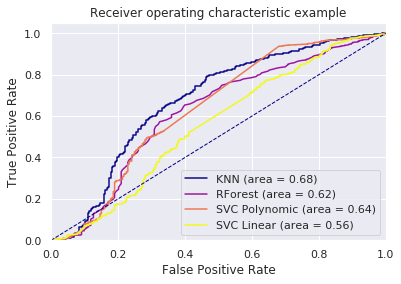

In [22]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})